In [1]:
## Imports and such
import sys
sys.path.append('../')

from ibmfl_cli_automator.run import get_config, Runner, changedict

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

fusion_algos = os.listdir("../../testtest/agg_tests")

In [4]:
fusion_algos

['shuf_iter_avg', 'fed_avg', 'prob_fed_match', 'coord_med', 'krum', 'iter_avg']

In [5]:
results = {}
n_trials = 7

In [6]:
import pandas as pd
import numpy as np

def av(item):
    arr = np.array(item)
    avg = arr.mean(axis=0).flatten()
    return avg

def process_trial_results(results):
    """
    averages the two numbers per round/metric, then takes the avg and std
    of each round/metric across the trials
    """
    dfs = []
    for i in range(n_trials):
        rounds = results[i]['metadata'][0]['round_no']
        dfs.append(pd.DataFrame(
            {key: av(item) for key, item in results[i].items()
            if key is not "metadata"},
            index=rounds
        ))

    return {
        "avg": pd.DataFrame(
            np.array(dfs).mean(axis=0), index=dfs[0].index, columns=dfs[0].columns
        ),
        "std": pd.DataFrame(
            np.array(dfs).std(axis=0), index=dfs[0].index, columns=dfs[0].columns
        )
    }


def process_better_trial_results(dfs):
    """
    averages the two numbers per round/metric, then takes the avg and std
    of each round/metric across the trials
    """

    return {
        "avg": pd.DataFrame(
            np.array(dfs).mean(axis=0), index=dfs[0].index, columns=dfs[0].columns
        ),
        "std": pd.DataFrame(
            np.array(dfs).std(axis=0), index=dfs[0].index, columns=dfs[0].columns
        )
    }

import json


def postproc_fn(staging):
    folder = f"{staging}/latest/"
    parties = {}
    for obj in os.listdir(folder):
        if obj.endswith(".json"):
            party = int(obj[:-5].split("party")[1])
            dfs = []
            with open(f"{folder}/{obj}", 'r') as openfile:
                json_object = json.load(openfile)
                for round in json_object:
                    round_no = round['round_no']
                    dfs.append(pd.DataFrame(round).iloc[:, 1:3])
                    dfs[round_no] = dfs[round_no].append(
                        pd.Series(
                            dfs[round_no].iloc[0] - dfs[0].iloc[0],
                            name="te"
                        )
                    )
                    dfs[round_no] = pd.Series(
                        dfs[round_no].iloc[:, 0].tolist() + \
                        dfs[round_no].iloc[:, 0].tolist(),
                        index=("pre_train:" + dfs[round_no].index).tolist() + \
                        ("post_train:" + dfs[round_no].index).tolist(),
                        name=round_no
                    )
                parties[party] = pd.DataFrame(dfs)

    round_results = np.array(list(parties.values())).mean(axis=0)

    round_avgs = pd.DataFrame(
        round_results,
        index=parties[0].index,
        columns=parties[0].columns
    )
    round_avgs.axes[0].name = "round"

    return round_avgs

'testing fusion algorithm:'

'shuf_iter_avg'

Starting trial 1/1 at 2023-04-15 03:45:45:
Trial has ID 20230415T034545
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-14 23:52:09!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T034545/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T034545/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T034545/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T034545/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T034545/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T034545/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T034545/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

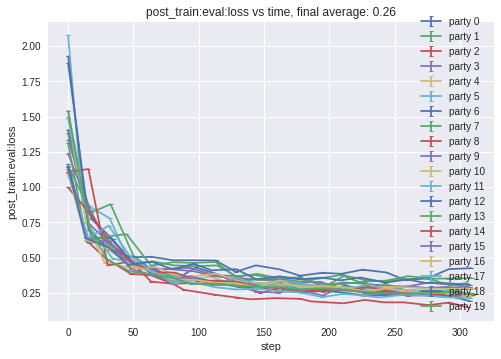

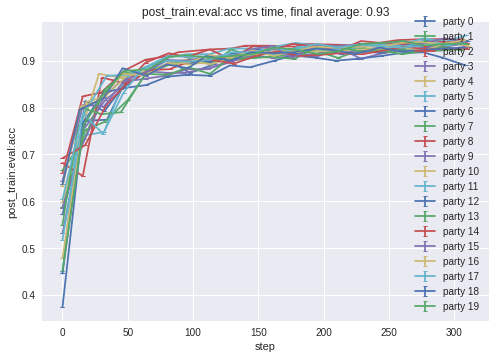

Starting trial 1/1 at 2023-04-15 03:52:18:
Trial has ID 20230415T035218
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-14 23:58:40!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035218/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035218/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035218/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035218/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035218/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035218/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035218/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

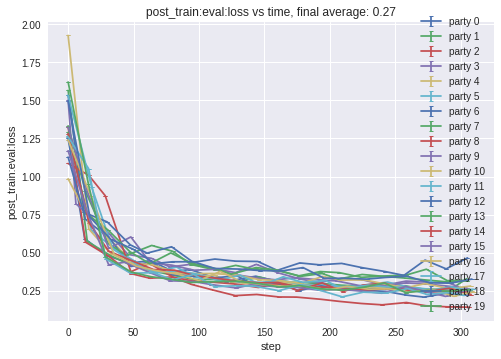

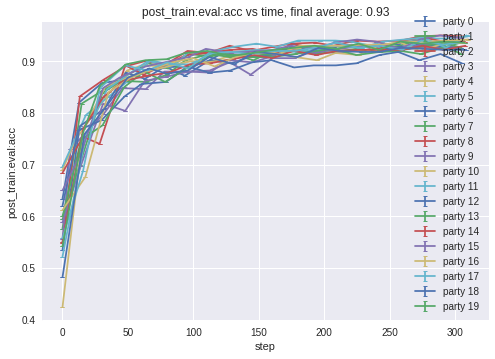

Starting trial 1/1 at 2023-04-15 03:58:49:
Trial has ID 20230415T035849
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 00:05:12!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035849/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035849/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035849/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035849/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035849/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035849/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T035849/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

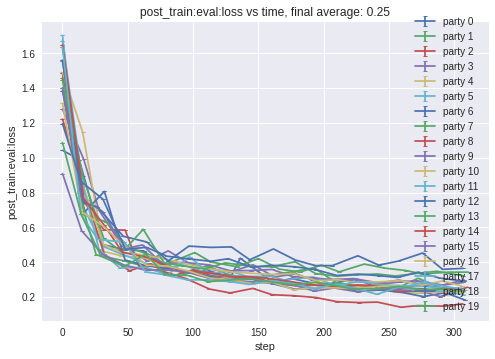

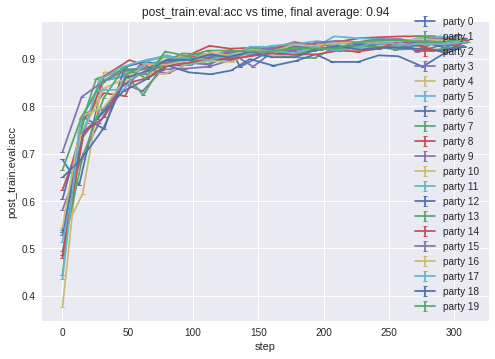

Starting trial 1/1 at 2023-04-15 04:05:21:
Trial has ID 20230415T040521
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 00:11:44!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T040521/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T040521/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T040521/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T040521/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T040521/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T040521/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T040521/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

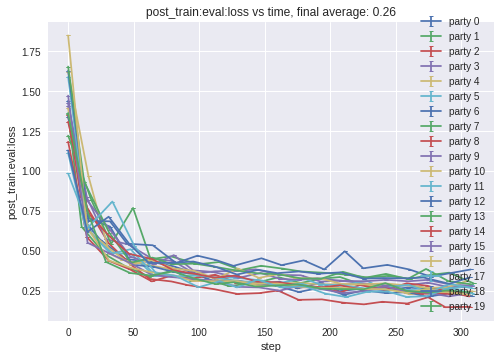

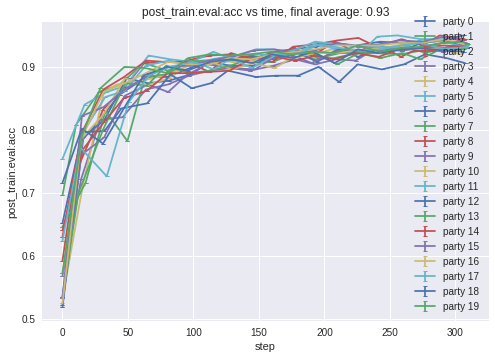

Starting trial 1/1 at 2023-04-15 04:11:53:
Trial has ID 20230415T041153
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 00:18:15!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041153/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041153/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041153/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041153/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041153/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041153/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041153/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

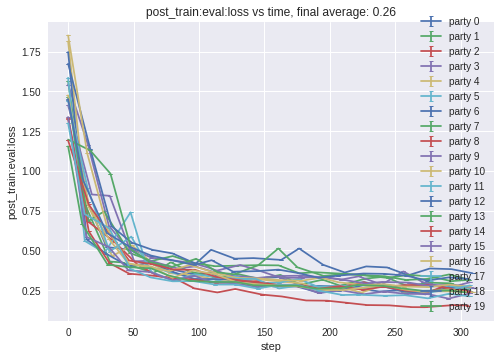

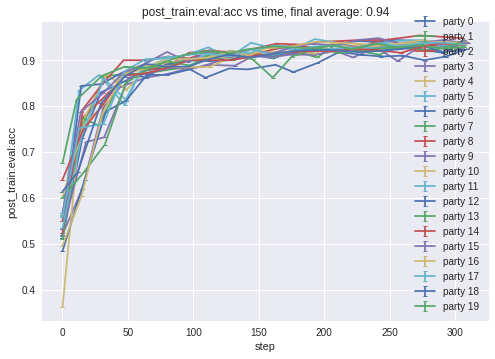

Starting trial 1/1 at 2023-04-15 04:18:24:
Trial has ID 20230415T041824
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 00:24:46!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041824/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041824/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041824/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041824/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041824/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041824/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T041824/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

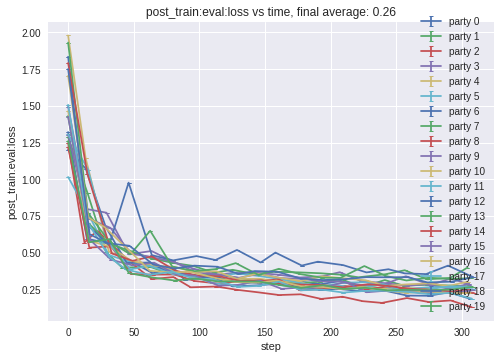

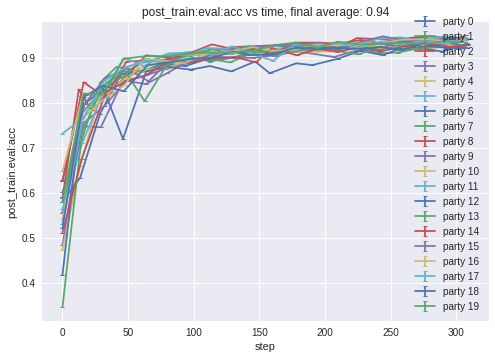

Starting trial 1/1 at 2023-04-15 04:24:55:
Trial has ID 20230415T042455
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 00:31:17!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T042455/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T042455/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T042455/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T042455/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T042455/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T042455/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T042455/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

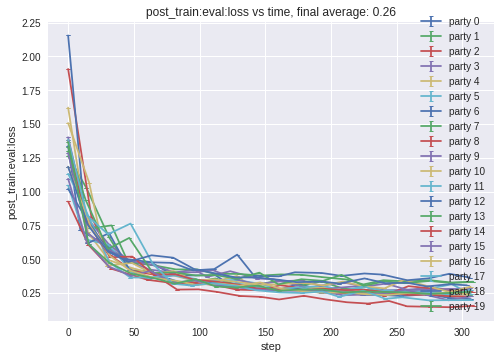

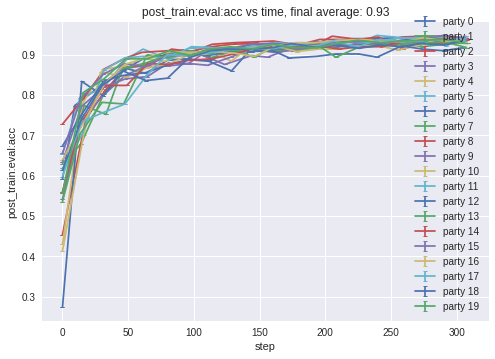

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681532e+09                  NaN                 NaN   
1      1.681532e+09             0.896568            0.796714   
2      1.681532e+09             0.480729            0.864071   
3      1.681532e+09             0.374625            0.890129   
4      1.681532e+09             0.333881            0.903114   
5      1.681532e+09             0.311414            0.910957   
6      1.681532e+09             0.296409            0.916600   
7      1.681532e+09             0.283966            0.921886   
8      1.681532e+09             0.273700            0.926700   
9      1.681532e+09             0.265558            0.931043   
10     1.681532e+09             0.258954            0.933386   
11     1.681532e+09             0.253712            0.934214   
12     1.681532e+09             0.246925            0.936229   
13     1.681532e+09             0.242239            0.937757   
14     1.681532e+09             0.237871            0.939357   
15     1.681532e+09             0.234098            0.939643   
16     1.681532e+09             0.230483            0.941171   
17     1.681532e+09             0.227255            0.942257   
18     1.681532e+09             0.224025            0.943043   
19     1.681532e+09             0.222227            0.944457   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.620857                        0.969929   
2                     0.855143                        0.926500   
3                     0.889786                        0.919714   
4                     0.904643                        0.922429   
5                     0.912286                        0.926786   
6                     0.918286                        0.929643   
7                     0.923214                        0.932929   
8                     0.927571                        0.935857   
9                     0.930857                        0.938929   
10                    0.933571                        0.940500   
11                    0.934571                        0.941429   
12                    0.937143                        0.943071   
13                    0.939000                        0.943857   
14                    0.940643                        0.945214   
15                    0.940857                        0.945714   
16                    0.942357                        0.947071   
17                    0.943429                        0.948000   
18                    0.944214                        0.948500   
19                    0.944929                        0.949429   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.456929                 0.558071   
2                         0.795500                 0.845714   
3                         0.861714                 0.885500   
4                         0.886571                 0.901643   
5                         0.898786                 0.909929   
6                         0.907286                 0.916071   
7                         0.914571                 0.920714   
8                         0.918714                 0.925571   
9                         0.924143                 0.929357   
10                        0.927929                 0.932143   
11                        0.929929                 0.933357   
12                        0.932071                 0.935571   
13                        0.934071                 0.937429   
14                        0.936000                 0.938929   
15                        0.936214                 0.939357   
16         

'testing fusion algorithm:'

'fed_avg'

Starting trial 1/1 at 2023-04-15 04:31:26:
Trial has ID 20230415T043126
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 00:37:49!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043126/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043126/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043126/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043126/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043126/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043126/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043126/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

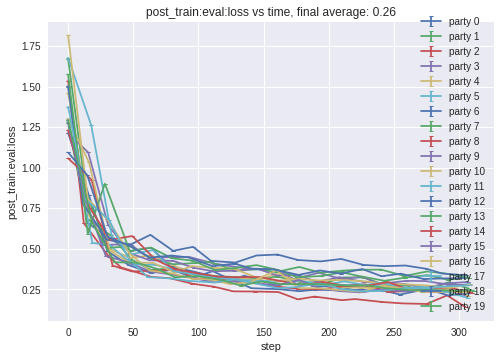

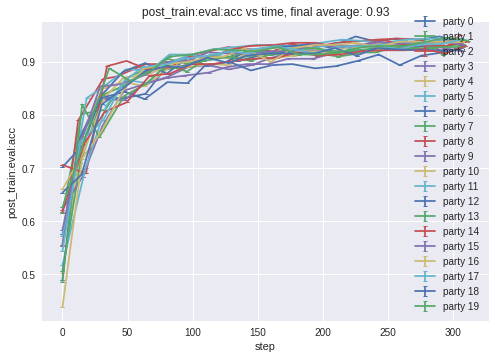

Starting trial 1/1 at 2023-04-15 04:37:58:
Trial has ID 20230415T043758
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 00:44:22!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043758/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043758/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043758/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043758/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043758/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043758/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T043758/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

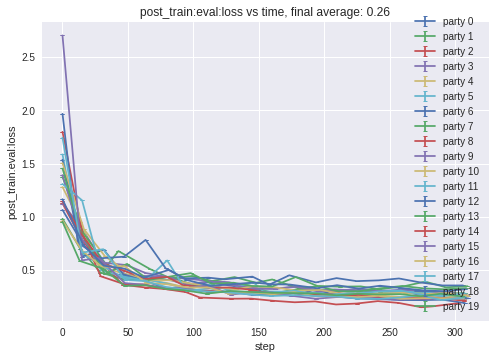

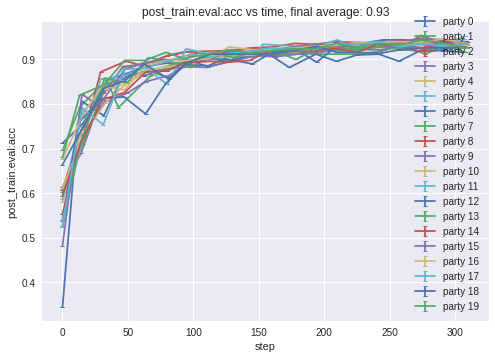

Starting trial 1/1 at 2023-04-15 04:44:30:
Trial has ID 20230415T044430
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 00:50:52!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T044430/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T044430/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T044430/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T044430/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T044430/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T044430/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T044430/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

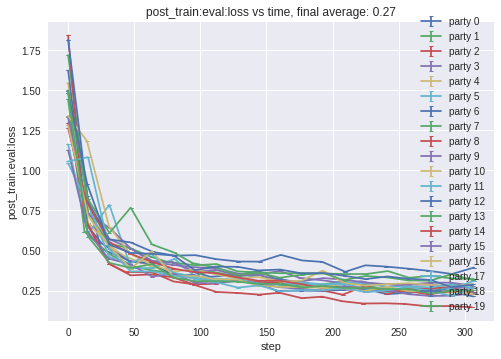

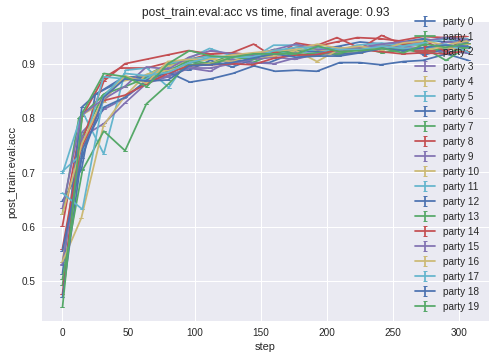

Starting trial 1/1 at 2023-04-15 04:51:00:
Trial has ID 20230415T045100
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 00:57:22!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045100/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045100/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045100/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045100/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045100/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045100/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045100/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

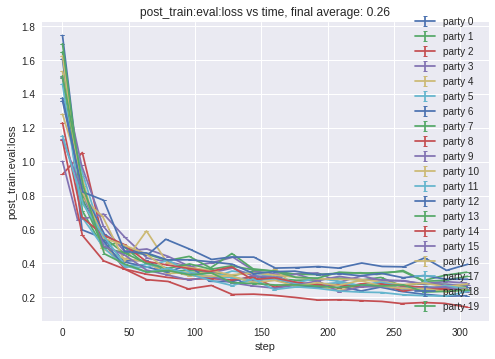

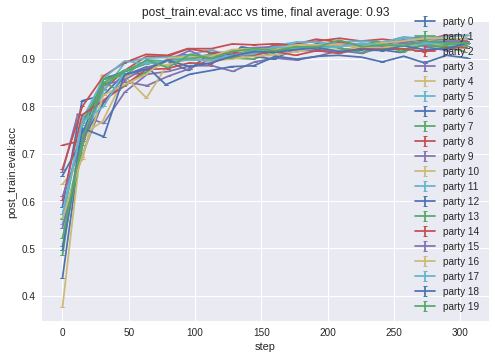

Starting trial 1/1 at 2023-04-15 04:57:30:
Trial has ID 20230415T045730
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 01:03:52!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045730/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045730/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045730/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045730/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045730/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045730/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T045730/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

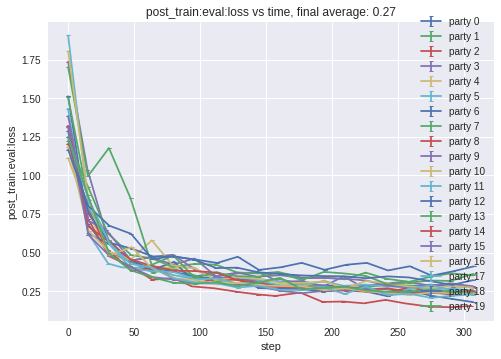

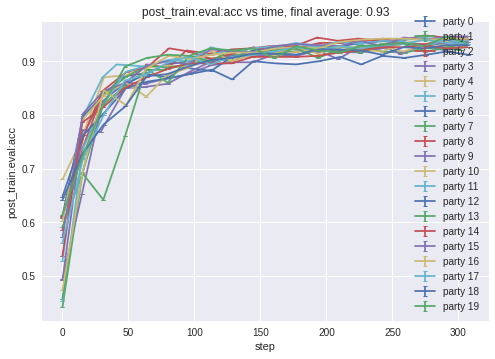

Starting trial 1/1 at 2023-04-15 05:04:01:
Trial has ID 20230415T050401
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 01:10:24!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T050401/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T050401/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T050401/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T050401/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T050401/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T050401/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T050401/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

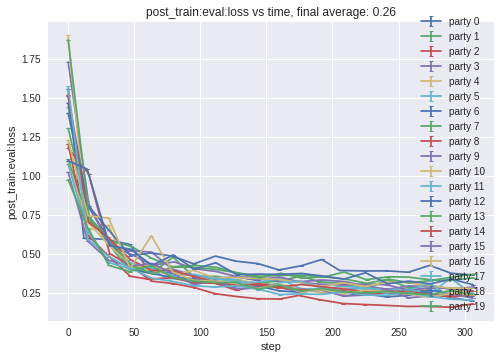

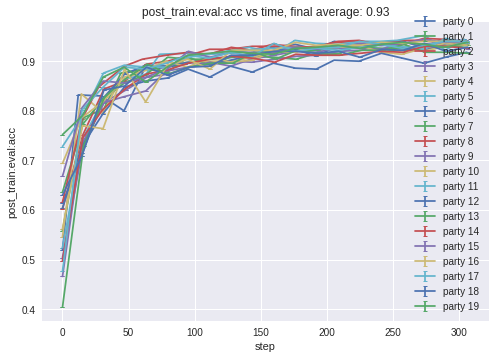

Starting trial 1/1 at 2023-04-15 05:10:32:
Trial has ID 20230415T051032
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 01:16:54!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051032/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051032/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051032/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051032/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051032/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051032/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051032/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

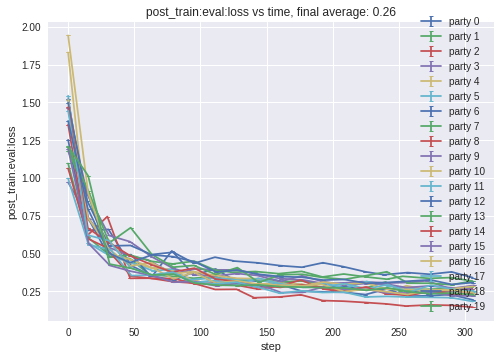

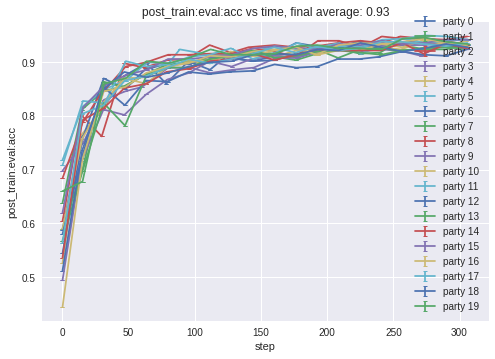

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681534e+09                  NaN                 NaN   
1      1.681534e+09             0.901639            0.793871   
2      1.681534e+09             0.476215            0.864929   
3      1.681534e+09             0.371536            0.889500   
4      1.681534e+09             0.332615            0.902600   
5      1.681534e+09             0.312623            0.910229   
6      1.681534e+09             0.295958            0.916914   
7      1.681534e+09             0.282847            0.922186   
8      1.681534e+09             0.274473            0.926543   
9      1.681534e+09             0.264897            0.930657   
10     1.681534e+09             0.258196            0.932800   
11     1.681534e+09             0.252112            0.934571   
12     1.681535e+09             0.246772            0.936343   
13     1.681535e+09             0.242701            0.937714   
14     1.681535e+09             0.237132            0.938571   
15     1.681535e+09             0.234971            0.940043   
16     1.681535e+09             0.230753            0.940943   
17     1.681535e+09             0.227023            0.941900   
18     1.681535e+09             0.223763            0.943271   
19     1.681535e+09             0.222071            0.943986   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.632214                        0.971214   
2                     0.857071                        0.927000   
3                     0.890143                        0.920786   
4                     0.904929                        0.922857   
5                     0.912429                        0.926214   
6                     0.918429                        0.929643   
7                     0.923857                        0.933429   
8                     0.927071                        0.935143   
9                     0.930214                        0.938357   
10                    0.932857                        0.940857   
11                    0.935071                        0.942071   
12                    0.937571                        0.942429   
13                    0.938786                        0.943714   
14                    0.940000                        0.945500   
15                    0.941286                        0.946500   
16                    0.941714                        0.947214   
17                    0.943143                        0.947643   
18                    0.944429                        0.948929   
19                    0.945143                        0.949571   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.469286                 0.573929   
2                         0.797500                 0.848643   
3                         0.861429                 0.885857   
4                         0.886929                 0.901643   
5                         0.899000                 0.909643   
6                         0.907500                 0.916500   
7                         0.914143                 0.921000   
8                         0.918714                 0.925286   
9                         0.923143                 0.928857   
10                        0.927571                 0.931500   
11                        0.930214                 0.933857   
12                        0.932429                 0.935857   
13                        0.933571                 0.937429   
14                        0.936071                 0.938857   
15                        0.936929                 0.940357   
16         

'testing fusion algorithm:'

'prob_fed_match'

Starting trial 1/1 at 2023-04-15 05:17:03:
Trial has ID 20230415T051703
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 01:25:31!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051703/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051703/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051703/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051703/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051703/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051703/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T051703/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

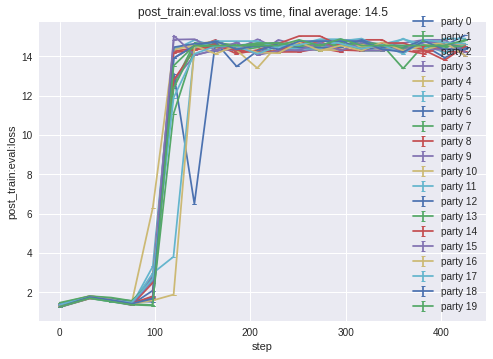

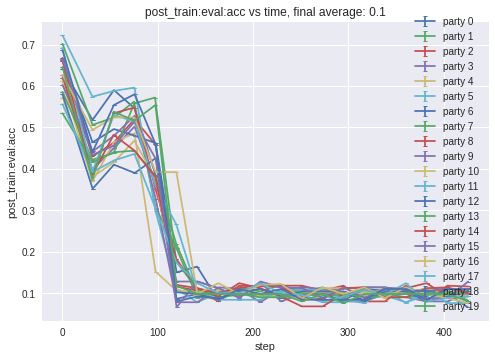

Starting trial 1/1 at 2023-04-15 05:25:38:
Trial has ID 20230415T052538
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 01:34:04!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T052538/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T052538/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T052538/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T052538/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T052538/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T052538/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T052538/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

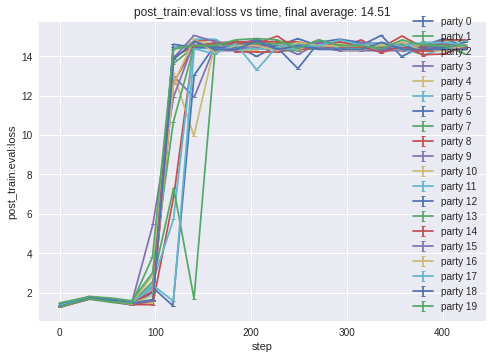

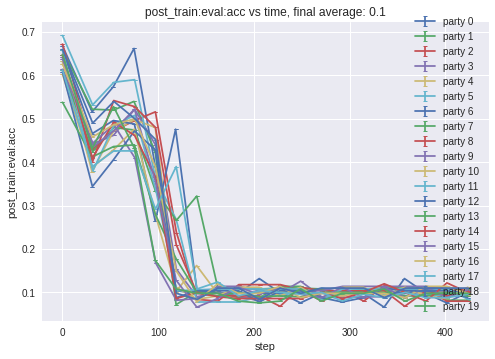

Starting trial 1/1 at 2023-04-15 05:34:11:
Trial has ID 20230415T053411
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 01:42:39!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T053411/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T053411/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T053411/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T053411/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T053411/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T053411/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T053411/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

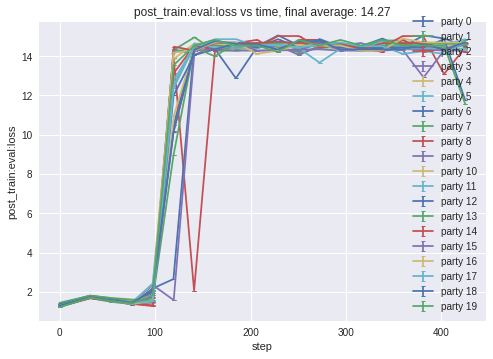

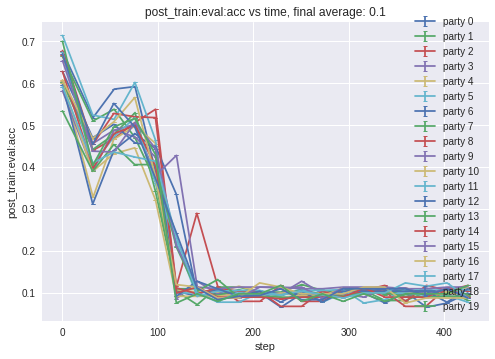

Starting trial 1/1 at 2023-04-15 05:42:45:
Trial has ID 20230415T054245
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 01:51:11!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T054245/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T054245/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T054245/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T054245/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T054245/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T054245/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T054245/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

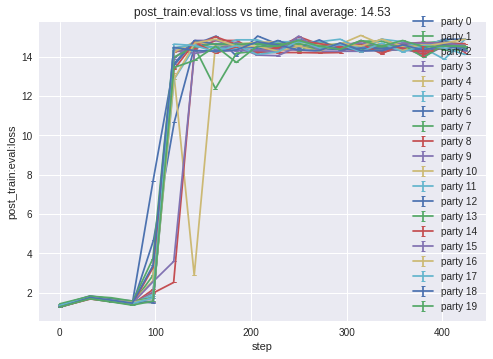

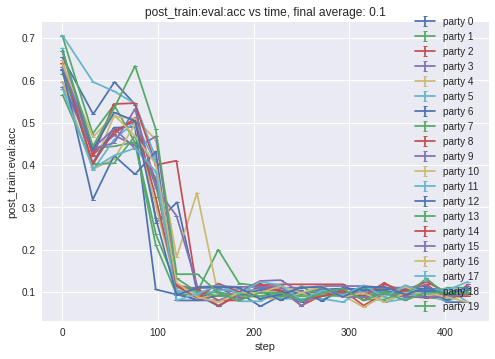

Starting trial 1/1 at 2023-04-15 05:51:18:
Trial has ID 20230415T055118
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 01:59:42!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055118/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055118/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055118/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055118/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055118/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055118/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055118/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

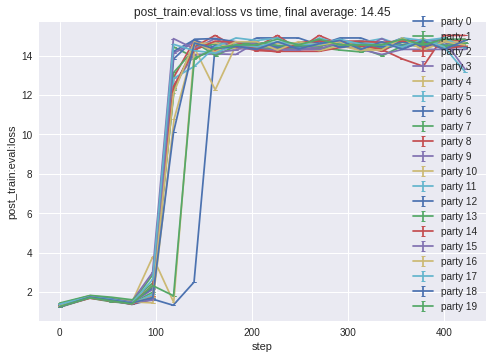

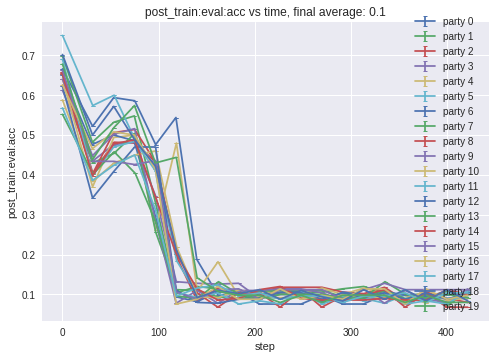

Starting trial 1/1 at 2023-04-15 05:59:49:
Trial has ID 20230415T055949
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 02:08:16!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055949/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055949/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055949/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055949/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055949/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055949/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T055949/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

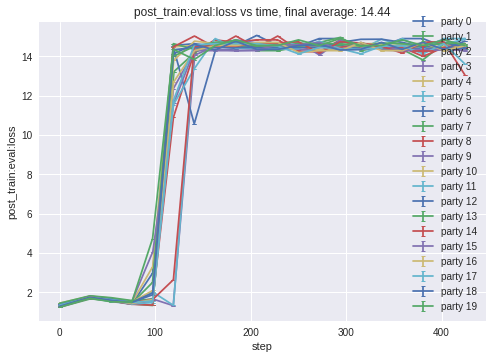

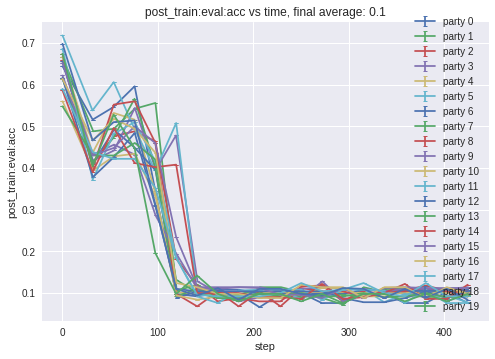

Starting trial 1/1 at 2023-04-15 06:08:23:
Trial has ID 20230415T060823
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 02:16:49!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T060823/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T060823/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T060823/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T060823/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T060823/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T060823/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T060823/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

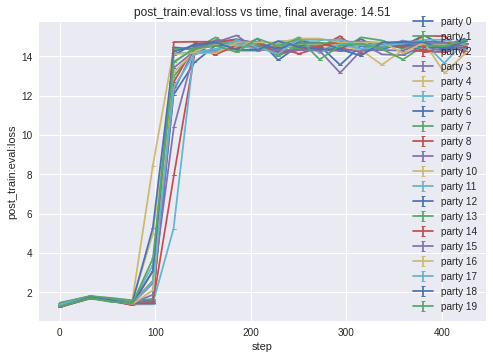

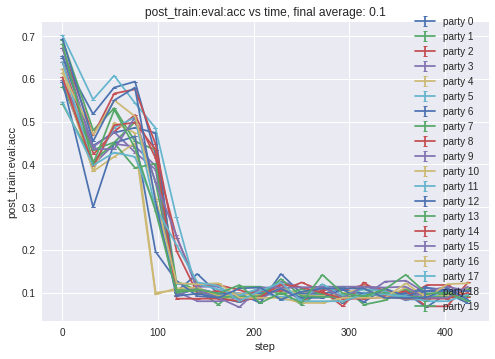

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681537e+09                  NaN                 NaN   
1      1.681537e+09             2.115420            0.228971   
2      1.681537e+09             2.042814            0.271629   
3      1.681538e+09             2.008676            0.274800   
4      1.681538e+09             1.971538            0.276614   
5      1.681538e+09             1.939928            0.277014   
6      1.681538e+09            13.195710            0.112800   
7      1.681538e+09             6.701403            0.125043   
8      1.681538e+09             7.553956            0.109400   
9      1.681538e+09             8.548298            0.100029   
10     1.681538e+09             6.841272            0.108657   
11     1.681538e+09             4.367542            0.106086   
12     1.681538e+09             8.538117            0.106829   
13     1.681538e+09             5.591298            0.103514   
14     1.681538e+09             8.439278            0.103429   
15     1.681538e+09             3.960729            0.108657   
16     1.681538e+09             5.834411            0.104257   
17     1.681538e+09             4.445094            0.108657   
18     1.681538e+09             4.938242            0.103429   
19     1.681538e+09             3.353249            0.108657   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.000500                        0.214286   
2                     0.002429                        0.521429   
3                     0.006857                        0.764286   
4                     0.029500                        1.000000   
5                     0.086643                        1.000000   
6                     0.112500                        0.112500   
7                     0.060929                        0.119143   
8                     0.092643                        0.094786   
9                     0.054714                        0.055000   
10                    0.032143                        0.032143   
11                    0.028857                        0.028857   
12                    0.078571                        0.079357   
13                    0.027429                        0.027643   
14                    0.072000                        0.072143   
15                    0.007071                        0.007714   
16                    0.083429                        0.109929   
17                    0.031071                        0.031143   
18                    0.056286                        0.056929   
19                    0.005000                        0.006357   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.000000                 0.000500   
2                         0.001286                 0.002429   
3                         0.003071                 0.006143   
4                         0.015357                 0.027429   
5                         0.045500                 0.066429   
6                         0.112500                 0.020000   
7                         0.059429                 0.011429   
8                         0.091071                 0.016929   
9                         0.054571                 0.010500   
10                        0.032143                 0.005714   
11                        0.028786                 0.005357   
12                        0.078214                 0.014071   
13                        0.027286                 0.005286   
14                        0.072000                 0.013357   
15                        0.006786                 0.001357   
16         

'testing fusion algorithm:'

'coord_med'

Starting trial 1/1 at 2023-04-15 06:16:57:
Trial has ID 20230415T061657
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 02:23:25!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T061657/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T061657/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T061657/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T061657/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T061657/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T061657/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T061657/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

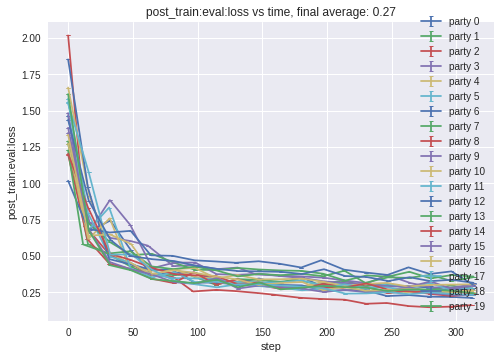

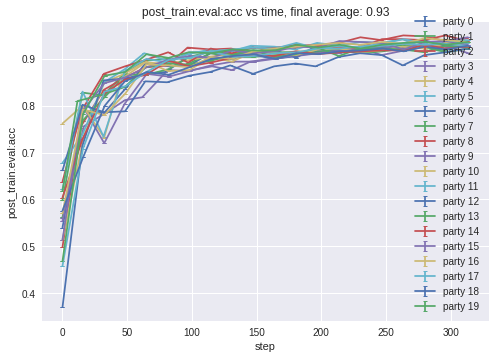

Starting trial 1/1 at 2023-04-15 06:23:33:
Trial has ID 20230415T062333
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 02:30:03!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T062333/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T062333/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T062333/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T062333/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T062333/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T062333/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T062333/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

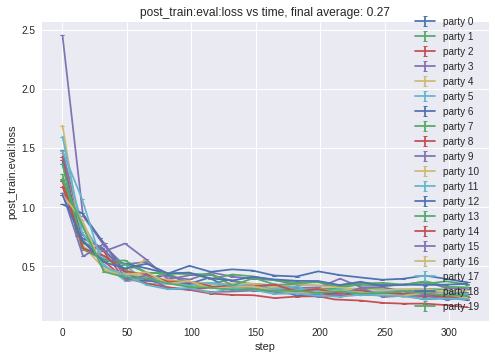

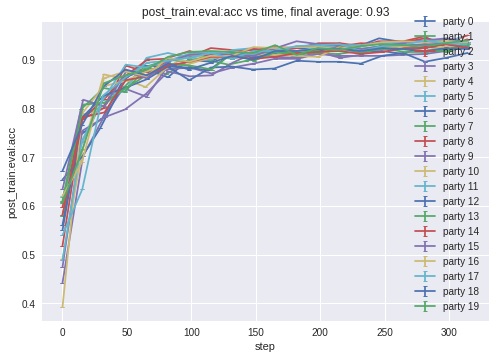

Starting trial 1/1 at 2023-04-15 06:30:11:
Trial has ID 20230415T063011
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 02:36:42!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063011/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063011/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063011/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063011/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063011/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063011/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063011/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

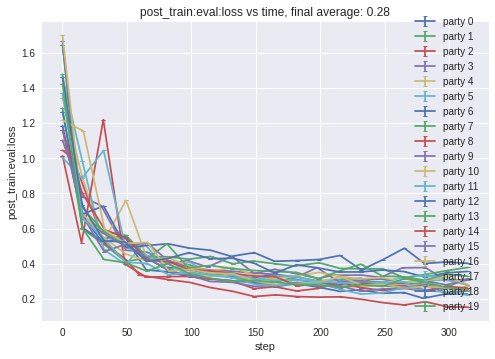

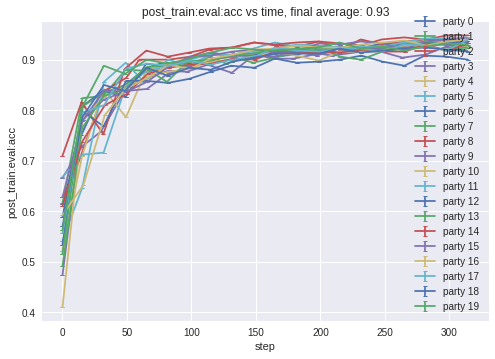

Starting trial 1/1 at 2023-04-15 06:36:50:
Trial has ID 20230415T063650
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 02:43:21!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063650/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063650/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063650/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063650/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063650/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063650/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T063650/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

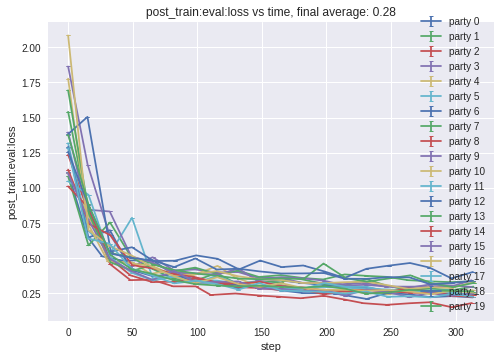

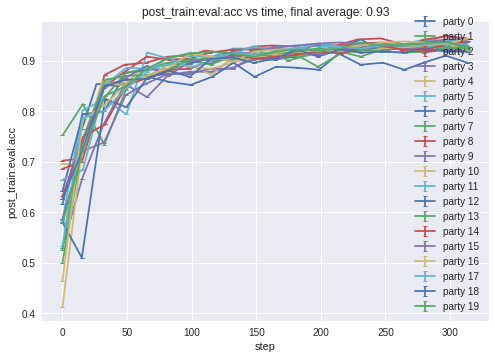

Starting trial 1/1 at 2023-04-15 06:43:28:
Trial has ID 20230415T064328
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 02:49:57!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T064328/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T064328/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T064328/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T064328/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T064328/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T064328/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T064328/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

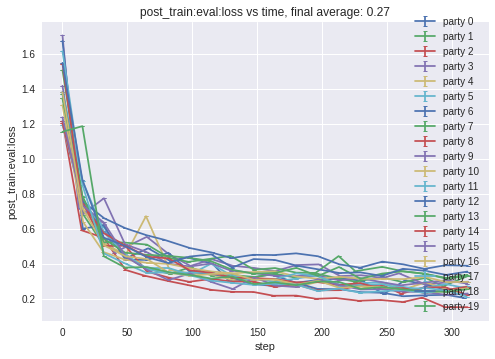

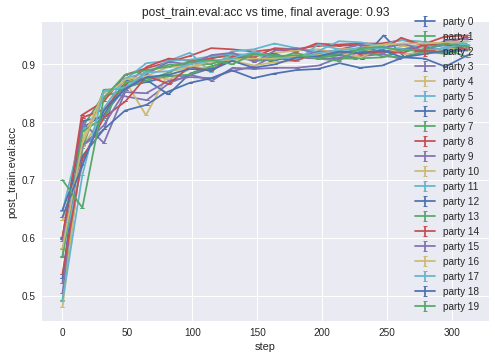

Starting trial 1/1 at 2023-04-15 06:50:05:
Trial has ID 20230415T065005
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 02:56:34!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065005/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065005/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065005/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065005/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065005/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065005/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065005/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

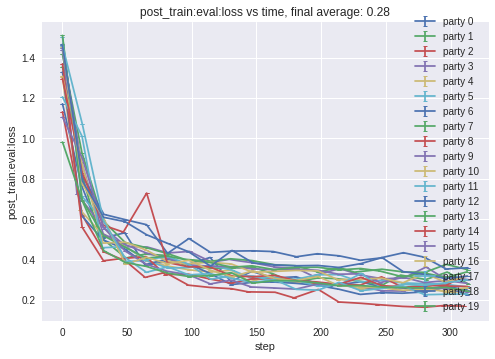

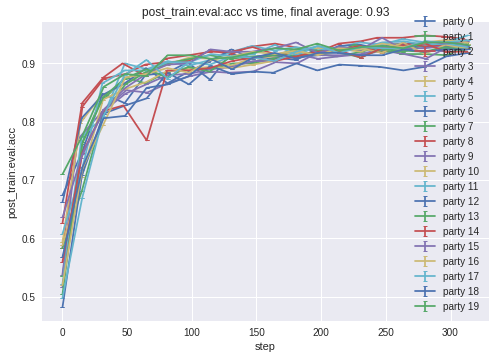

Starting trial 1/1 at 2023-04-15 06:56:42:
Trial has ID 20230415T065642
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 03:03:11!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065642/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065642/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065642/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065642/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065642/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065642/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T065642/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

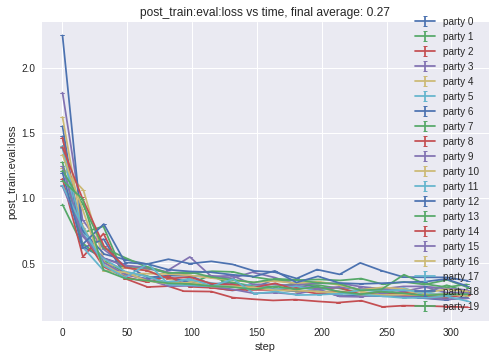

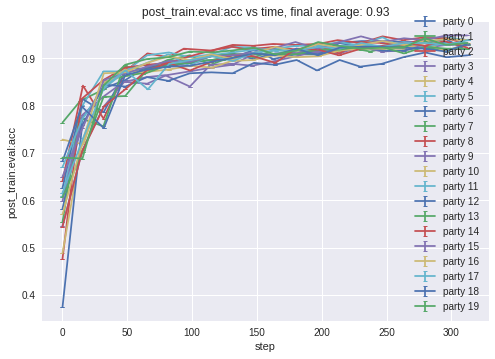

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681541e+09                  NaN                 NaN   
1      1.681541e+09             0.920470            0.785814   
2      1.681541e+09             0.501007            0.860214   
3      1.681541e+09             0.383851            0.885629   
4      1.681541e+09             0.341551            0.899700   
5      1.681541e+09             0.320000            0.908329   
6      1.681541e+09             0.305174            0.914957   
7      1.681541e+09             0.294924            0.918700   
8      1.681541e+09             0.283276            0.923614   
9      1.681541e+09             0.276131            0.927143   
10     1.681541e+09             0.269315            0.929714   
11     1.681541e+09             0.262051            0.931943   
12     1.681541e+09             0.257350            0.933629   
13     1.681541e+09             0.251713            0.934957   
14     1.681541e+09             0.246208            0.936586   
15     1.681541e+09             0.242164            0.937614   
16     1.681541e+09             0.239048            0.938671   
17     1.681541e+09             0.235644            0.939586   
18     1.681541e+09             0.232771            0.941329   
19     1.681541e+09             0.229412            0.942114   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.603714                        0.968571   
2                     0.848571                        0.928143   
3                     0.885214                        0.918214   
4                     0.901429                        0.920571   
5                     0.909143                        0.924071   
6                     0.915786                        0.927857   
7                     0.919643                        0.929500   
8                     0.924500                        0.932714   
9                     0.927929                        0.934857   
10                    0.929929                        0.937429   
11                    0.931786                        0.938571   
12                    0.933929                        0.939714   
13                    0.936500                        0.941714   
14                    0.938214                        0.943643   
15                    0.939071                        0.944500   
16                    0.939714                        0.944714   
17                    0.940429                        0.946071   
18                    0.942357                        0.947000   
19                    0.943143                        0.948071   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.438214                 0.535714   
2                         0.781643                 0.838000   
3                         0.854143                 0.880214   
4                         0.883357                 0.898071   
5                         0.895000                 0.906571   
6                         0.903571                 0.913429   
7                         0.910357                 0.918357   
8                         0.915643                 0.922500   
9                         0.920143                 0.926143   
10                        0.923214                 0.928571   
11                        0.926643                 0.930500   
12                        0.928786                 0.933071   
13                        0.931500                 0.934929   
14                        0.933429                 0.936786   
15                        0.934429                 0.937857   
16         

'testing fusion algorithm:'

'krum'

Starting trial 1/1 at 2023-04-15 07:03:20:
Trial has ID 20230415T070320
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 03:09:57!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T070320/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T070320/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T070320/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T070320/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T070320/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T070320/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T070320/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

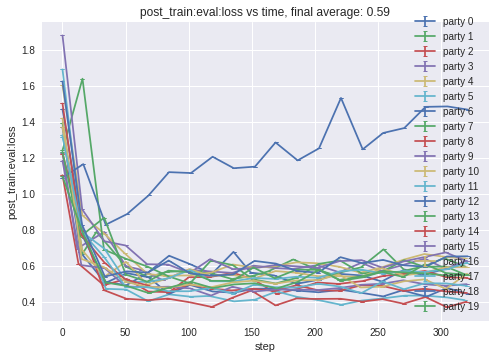

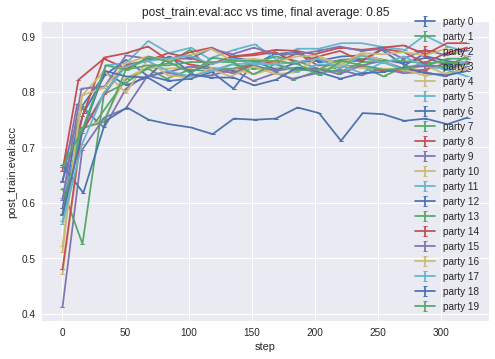

Starting trial 1/1 at 2023-04-15 07:10:05:
Trial has ID 20230415T071005
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 03:16:42!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071005/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071005/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071005/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071005/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071005/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071005/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071005/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

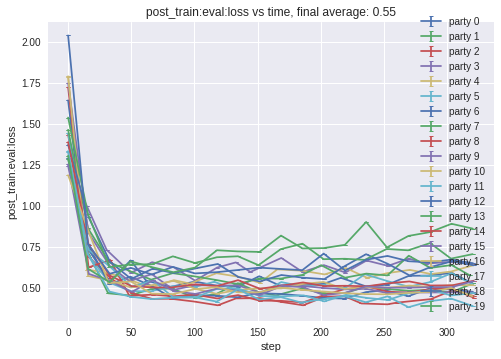

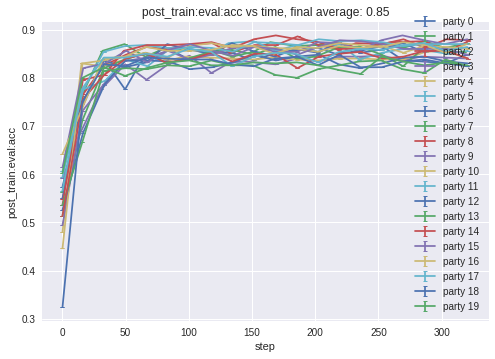

Starting trial 1/1 at 2023-04-15 07:16:51:
Trial has ID 20230415T071651
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 03:23:27!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071651/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071651/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071651/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071651/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071651/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071651/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T071651/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

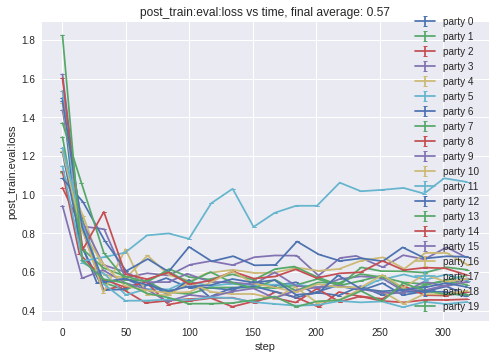

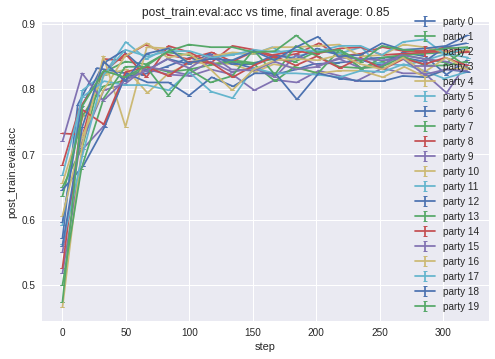

Starting trial 1/1 at 2023-04-15 07:23:35:
Trial has ID 20230415T072335
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 03:30:09!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T072335/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T072335/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T072335/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T072335/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T072335/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T072335/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T072335/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

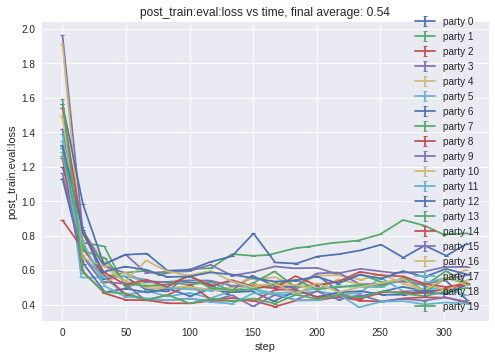

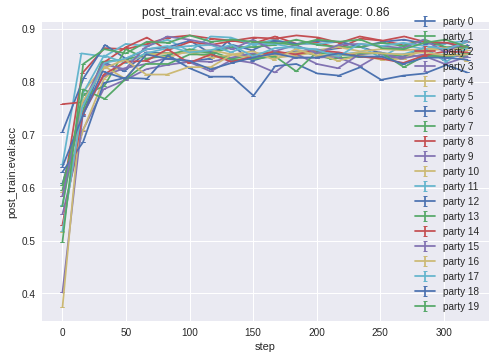

Starting trial 1/1 at 2023-04-15 07:30:18:
Trial has ID 20230415T073018
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 03:36:54!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073018/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073018/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073018/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073018/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073018/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073018/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073018/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

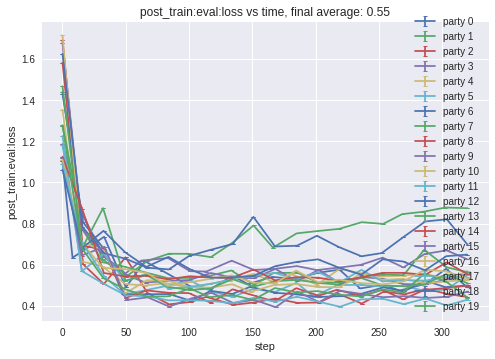

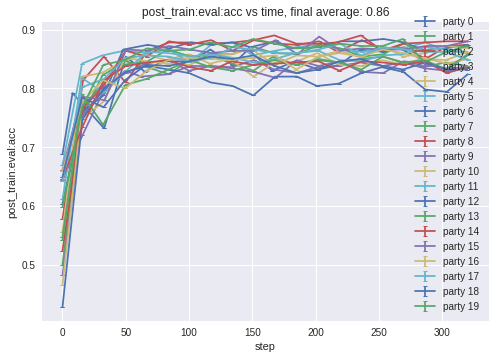

Starting trial 1/1 at 2023-04-15 07:37:03:
Trial has ID 20230415T073703
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 03:43:38!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073703/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073703/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073703/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073703/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073703/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073703/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T073703/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

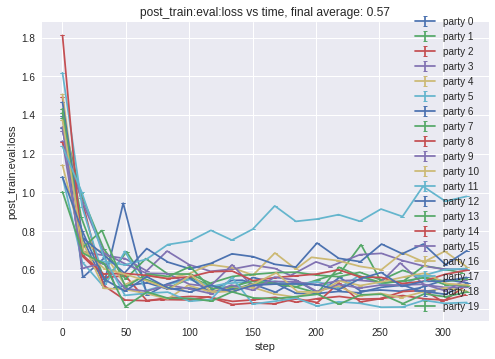

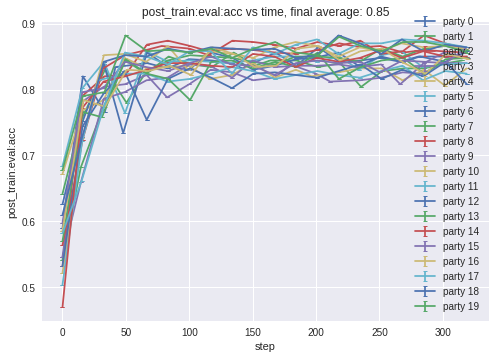

Starting trial 1/1 at 2023-04-15 07:43:47:
Trial has ID 20230415T074347
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 03:50:24!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T074347/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T074347/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T074347/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T074347/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T074347/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T074347/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T074347/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

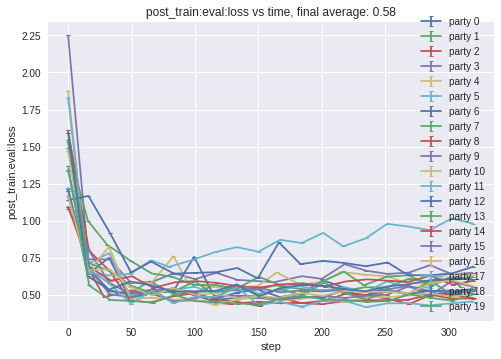

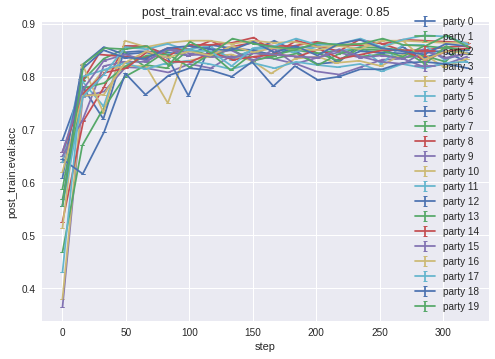

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681543e+09                  NaN                 NaN   
1      1.681543e+09             1.370986            0.563600   
2      1.681544e+09             0.810789            0.741571   
3      1.681544e+09             0.649342            0.800643   
4      1.681544e+09             0.654925            0.812443   
5      1.681544e+09             0.719322            0.806057   
6      1.681544e+09             0.734619            0.811529   
7      1.681544e+09             0.742968            0.814357   
8      1.681544e+09             0.802425            0.810857   
9      1.681544e+09             0.831795            0.809014   
10     1.681544e+09             0.836157            0.813400   
11     1.681544e+09             0.866345            0.813186   
12     1.681544e+09             0.883873            0.812929   
13     1.681544e+09             0.888396            0.815957   
14     1.681544e+09             0.920697            0.810000   
15     1.681544e+09             0.921127            0.813757   
16     1.681544e+09             0.934113            0.815671   
17     1.681544e+09             0.966950            0.815900   
18     1.681544e+09             0.987486            0.812886   
19     1.681544e+09             0.998277            0.813500   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.530000                        0.751357   
2                     0.739643                        0.813071   
3                     0.803571                        0.839929   
4                     0.816000                        0.841500   
5                     0.809143                        0.828643   
6                     0.813929                        0.831571   
7                     0.817214                        0.832714   
8                     0.814143                        0.826643   
9                     0.811429                        0.823500   
10                    0.816429                        0.826071   
11                    0.815857                        0.826929   
12                    0.814071                        0.823429   
13                    0.818000                        0.827214   
14                    0.812857                        0.821429   
15                    0.816000                        0.824357   
16                    0.817571                        0.825000   
17                    0.817857                        0.825214   
18                    0.814786                        0.822214   
19                    0.814714                        0.821786   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.415643                 0.429857   
2                         0.678429                 0.712071   
3                         0.770143                 0.794571   
4                         0.791857                 0.808786   
5                         0.790286                 0.800929   
6                         0.797500                 0.807500   
7                         0.801643                 0.810786   
8                         0.801286                 0.807786   
9                         0.799786                 0.805929   
10                        0.806786                 0.810571   
11                        0.805214                 0.809286   
12                        0.805500                 0.808929   
13                        0.809143                 0.812429   
14                        0.803643                 0.806500   
15                        0.807786                 0.809929   
16         

'testing fusion algorithm:'

'iter_avg'

Starting trial 1/1 at 2023-04-15 07:50:32:
Trial has ID 20230415T075032
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 03:56:54!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075032/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075032/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075032/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075032/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075032/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075032/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075032/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

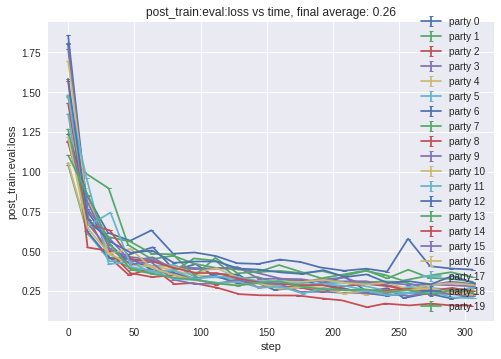

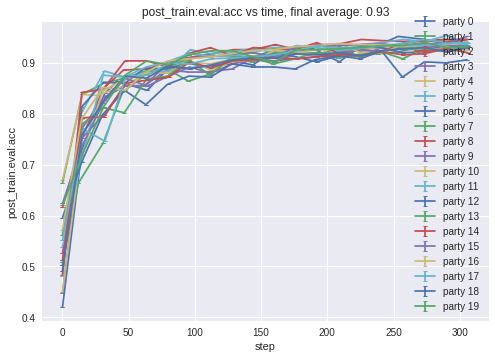

Starting trial 1/1 at 2023-04-15 07:57:02:
Trial has ID 20230415T075702
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 04:03:24!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075702/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075702/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075702/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075702/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075702/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075702/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T075702/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

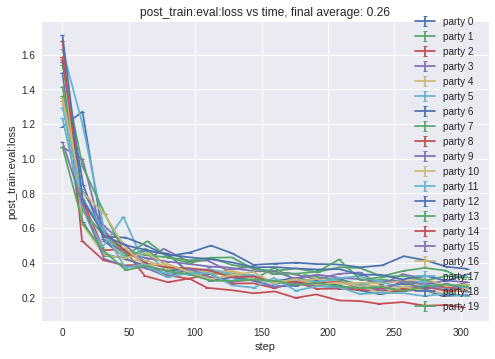

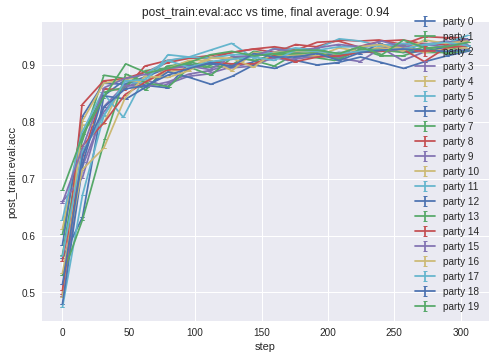

Starting trial 1/1 at 2023-04-15 08:03:32:
Trial has ID 20230415T080332
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 04:09:53!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T080332/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T080332/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T080332/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T080332/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T080332/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T080332/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T080332/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

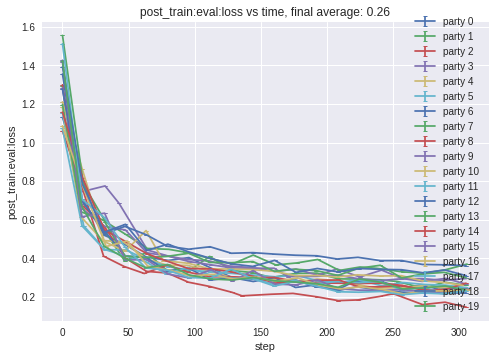

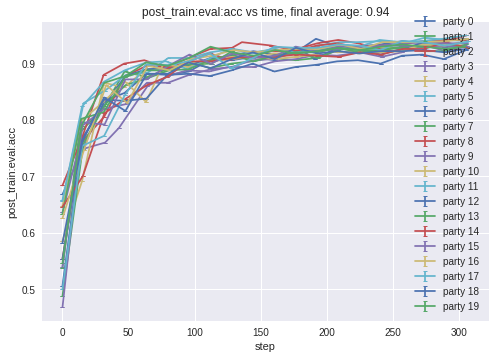

Starting trial 1/1 at 2023-04-15 08:10:01:
Trial has ID 20230415T081001
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 04:16:22!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081001/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081001/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081001/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081001/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081001/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081001/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081001/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

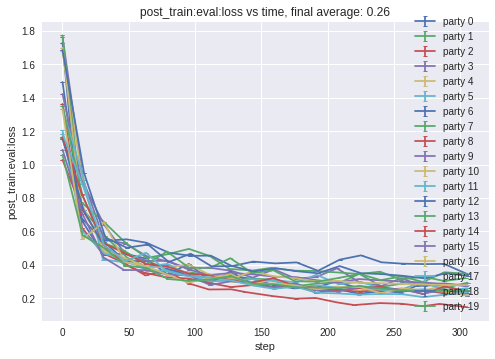

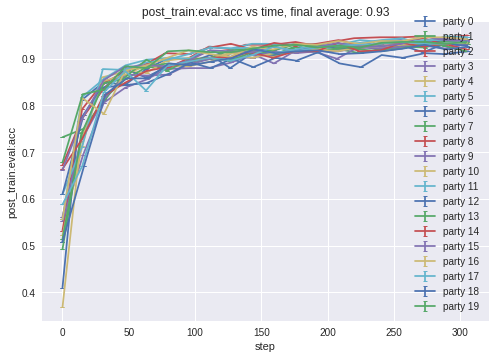

Starting trial 1/1 at 2023-04-15 08:16:30:
Trial has ID 20230415T081630
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 04:22:52!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081630/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081630/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081630/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081630/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081630/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081630/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T081630/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

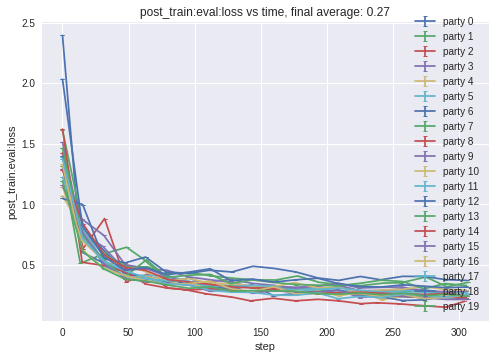

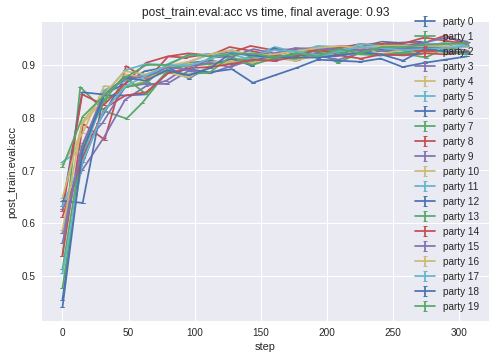

Starting trial 1/1 at 2023-04-15 08:23:01:
Trial has ID 20230415T082301
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 04:29:21!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082301/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082301/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082301/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082301/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082301/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082301/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082301/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

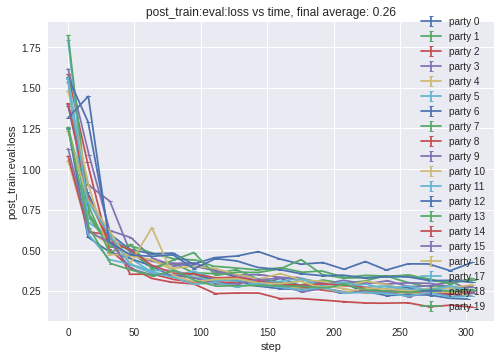

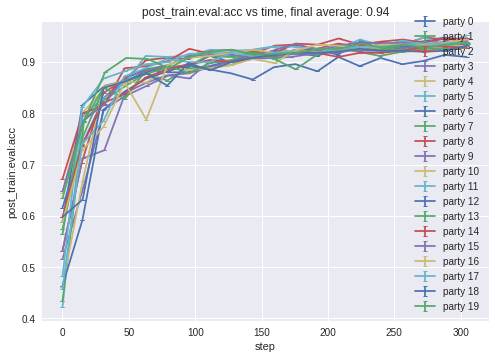

Starting trial 1/1 at 2023-04-15 08:29:30:
Trial has ID 20230415T082930
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-15 04:35:53!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082930/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082930/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082930/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082930/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082930/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082930/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230415T082930/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

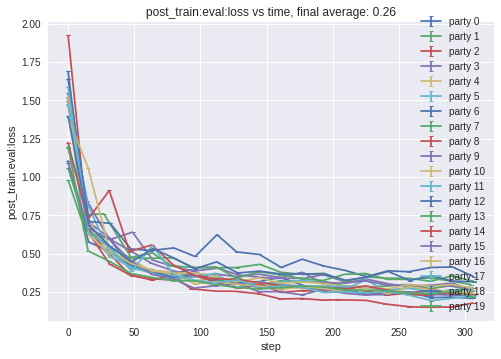

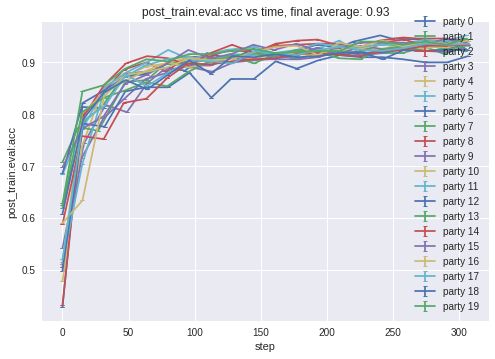

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681546e+09                  NaN                 NaN   
1      1.681546e+09             0.871776            0.799814   
2      1.681546e+09             0.479494            0.863829   
3      1.681546e+09             0.374177            0.889429   
4      1.681546e+09             0.333839            0.902886   
5      1.681546e+09             0.314195            0.909543   
6      1.681546e+09             0.297843            0.916343   
7      1.681546e+09             0.286542            0.921143   
8      1.681546e+09             0.274770            0.926686   
9      1.681546e+09             0.266396            0.930200   
10     1.681546e+09             0.258949            0.932729   
11     1.681546e+09             0.253040            0.934286   
12     1.681546e+09             0.246527            0.936657   
13     1.681546e+09             0.242558            0.937700   
14     1.681546e+09             0.238276            0.938871   
15     1.681547e+09             0.233782            0.939814   
16     1.681547e+09             0.230373            0.940771   
17     1.681547e+09             0.227126            0.941814   
18     1.681547e+09             0.224278            0.942486   
19     1.681547e+09             0.223383            0.943314   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.644214                        0.962857   
2                     0.855357                        0.925357   
3                     0.888929                        0.918714   
4                     0.904357                        0.922429   
5                     0.911286                        0.924714   
6                     0.918357                        0.929071   
7                     0.921857                        0.932000   
8                     0.926857                        0.935071   
9                     0.930000                        0.938000   
10                    0.933000                        0.940143   
11                    0.934857                        0.941929   
12                    0.937500                        0.943500   
13                    0.938786                        0.944714   
14                    0.940000                        0.946143   
15                    0.941071                        0.946929   
16                    0.941929                        0.946571   
17                    0.943500                        0.948071   
18                    0.943857                        0.948143   
19                    0.944643                        0.948357   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.484143                 0.581643   
2                         0.795000                 0.844929   
3                         0.860786                 0.884571   
4                         0.886429                 0.901000   
5                         0.898071                 0.908643   
6                         0.907000                 0.915714   
7                         0.912857                 0.919429   
8                         0.918143                 0.925286   
9                         0.923214                 0.928857   
10                        0.927571                 0.931214   
11                        0.929714                 0.933429   
12                        0.932214                 0.936071   
13                        0.933857                 0.937429   
14                        0.935571                 0.939000   
15                        0.936643                 0.940000   
16         

In [7]:
for fusion in fusion_algos:
    display("testing fusion algorithm:")
    display(fusion)
    agg, party, glob = get_config(f"../../testtest/agg_tests/{fusion}/")
    results[fusion] = []
    machines = glob['machines']
    experiments = glob['experiments']
    agg['hyperparams']['global']['termination_accuracy'] = 0.999
#     agg['hyperparams']['global']['rounds'] = 5
#     experiments[0]['n_parties'] = 5

    for i in range(n_trials):
        runner = Runner()
        experiments[0]
        runner.run_experiment(
            experiments[0],
            machines,
            agg,
            party,
            ui_mode="cli"
        )

        runner.call_postproc_fn()
        results[fusion].append(postproc_fn(f"../../"))

    results[fusion] = process_better_trial_results(results[fusion])
    results[fusion]['avg'].to_csv(f"../../testtest/agg_tests/{fusion}/results_avg_2.csv")
    results[fusion]['std'].to_csv(f"../../testtest/agg_tests/{fusion}/results_std_2.csv")
    display(results[fusion]['avg'])
    

In [8]:
results['iter_avg']['avg'].columns

Index(['pre_train:ts', 'pre_train:eval:loss', 'pre_train:eval:acc',
       'pre_train:eval:f1 micro', 'pre_train:eval:precision micro',
       'pre_train:eval:recall micro', 'pre_train:eval:f1 macro',
       'pre_train:eval:precision macro', 'pre_train:eval:recall macro',
       'pre_train:eval:f1 weighted', 'pre_train:eval:precision weighted',
       'pre_train:eval:recall weighted', 'pre_train:te', 'post_train:ts',
       'post_train:eval:loss', 'post_train:eval:acc',
       'post_train:eval:f1 micro', 'post_train:eval:precision micro',
       'post_train:eval:recall micro', 'post_train:eval:f1 macro',
       'post_train:eval:precision macro', 'post_train:eval:recall macro',
       'post_train:eval:f1 weighted', 'post_train:eval:precision weighted',
       'post_train:eval:recall weighted', 'post_train:te'],
      dtype='object')

### GET FED AVG WORKING!!

In [13]:
for fusion in fusion_algos:
    results[fusion] = {}
    results[fusion]['avg'] = pd.read_csv(f"../../testtest/agg_tests/{fusion}/results_avg_2.csv", index_col=0)
    results[fusion]['std'] = pd.read_csv(f"../../testtest/agg_tests/{fusion}/results_std_2.csv", index_col=0)
    results[fusion]['avg']['train_time'] = results[fusion]['avg']['post_train:ts'] - results[fusion]['avg']['pre_train:ts'][0]
    results[fusion]['std']['train_time'] = results[fusion]['std']['post_train:ts'] - results[fusion]['std']['pre_train:ts'][0]
results

{'shuf_iter_avg': {'avg':        pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
  round                                                          
  0      1.681532e+09                  NaN                 NaN   
  1      1.681532e+09             0.896568            0.796714   
  2      1.681532e+09             0.480729            0.864071   
  3      1.681532e+09             0.374625            0.890129   
  4      1.681532e+09             0.333881            0.903114   
  5      1.681532e+09             0.311414            0.910957   
  6      1.681532e+09             0.296409            0.916600   
  7      1.681532e+09             0.283966            0.921886   
  8      1.681532e+09             0.273700            0.926700   
  9      1.681532e+09             0.265558            0.931043   
  10     1.681532e+09             0.258954            0.933386   
  11     1.681532e+09             0.253712            0.934214   
  12     1.681532e+09             0.246925          

In [14]:
import matplotlib.pyplot as plt

In [15]:
def plot_results(dict, round, metric):
    plt.figure()
    plt.title(f"{metric} per fusion algorithm at round {round}")
    for i, fusion in enumerate(dict.keys()):
        if dict[fusion]['avg'].shape[0] > 1 or round == 1:
            if round == -1:
                label = f"round {dict[fusion]['avg'].index[-1]}"
            else:
                label = ""
            plt.errorbar(
                [i],
                [dict[fusion]['avg'].iloc[round-1][metric]],
                [dict[fusion]['std'].iloc[round-1][metric]],
                marker='s', mfc='red', label=label
            )
    plt.xticks(np.arange(6), dict.keys())
    plt.ylabel(metric)
    if round == -1:
        plt.legend()
    plt.show()

    
def plot_results2(dict, metric):
    """
    """
    plt.figure()
    plt.title(f"{metric} per fusion algorithm vs training time")
    for i, fusion in enumerate(dict.keys()):
        if dict[fusion]['avg'].shape[0] > 1 or round == 1:
            plt.errorbar(
                dict[fusion]['avg']['train_time'],
                dict[fusion]['avg'][metric],
                dict[fusion]['std'][metric],
#                 marker='s', mfc='red',
                label=fusion
            )
#     plt.xticks(np.arange(6), dict.keys())
    plt.ylabel(metric)
    plt.xlabel("training time")
    plt.legend()
    plt.show()


def earlystop_results(results, metric, cutoff):
    resultscopy = {}
    for i, fusion in enumerate(results.keys()):
        resultscopy[fusion] = {}
        resultscopy[fusion]['avg'] = results[fusion]['avg'].loc[
            results[fusion]['avg'][metric] <= cutoff].copy()
        resultscopy[fusion]['std'] = results[fusion]['std'].loc[
            resultscopy[fusion]['avg'].index].copy()
    return resultscopy

In [16]:
earlystop_results(results, "post_train:eval:acc", 0.9)

{'shuf_iter_avg': {'avg':        pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
  round                                                          
  1      1.681532e+09             0.896568            0.796714   
  2      1.681532e+09             0.480729            0.864071   
  3      1.681532e+09             0.374625            0.890129   
  
         pre_train:eval:f1 micro  pre_train:eval:precision micro  \
  round                                                            
  1                     0.620857                        0.969929   
  2                     0.855143                        0.926500   
  3                     0.889786                        0.919714   
  
         pre_train:eval:recall micro  pre_train:eval:f1 macro  \
  round                                                         
  1                         0.456929                 0.558071   
  2                         0.795500                 0.845714   
  3                         0.861714    

flf1 weighted - 

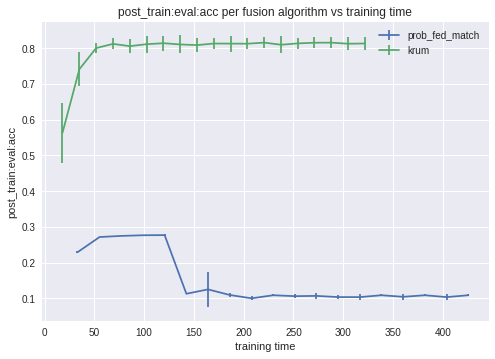

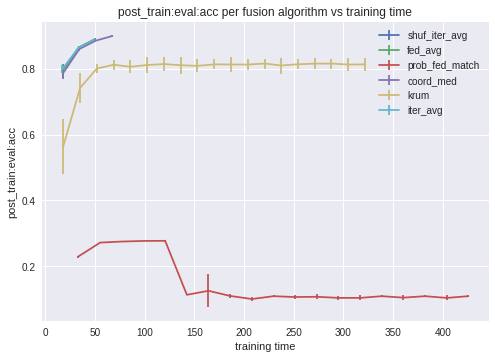

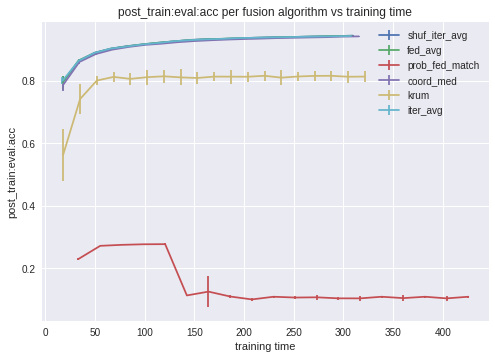

In [17]:
plot_results2(earlystop_results(results, "post_train:eval:acc", 0.85), "post_train:eval:acc")

plot_results2(earlystop_results(results, "post_train:eval:acc", 0.9), "post_train:eval:acc")

plot_results2(earlystop_results(results, "post_train:eval:acc", 0.95), "post_train:eval:acc")

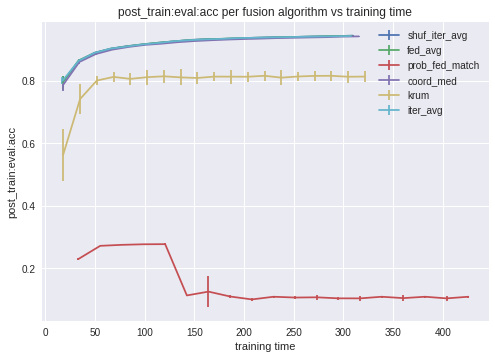

In [18]:
# plot_results2(results, "train_time")
plot_results2(results, "post_train:eval:acc")


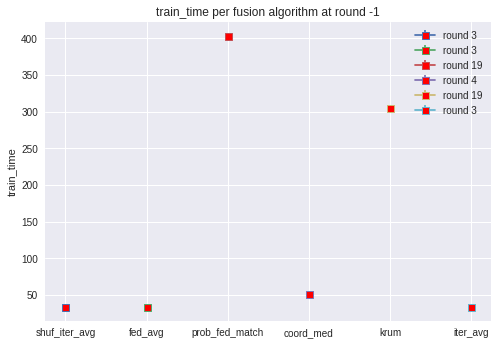

In [19]:
plot_results(
    earlystop_results(results, "post_train:eval:acc", 0.9),
    -1,
    "train_time"
)

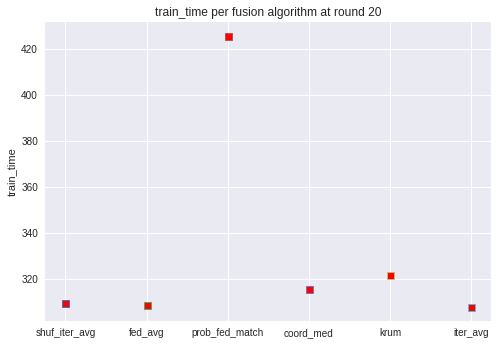

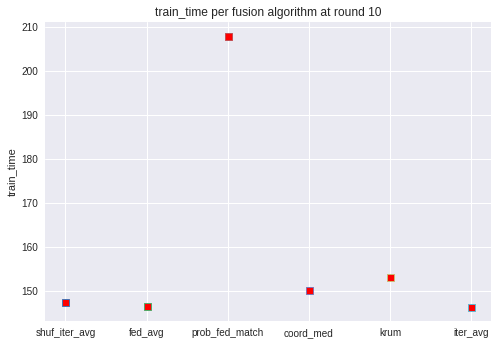

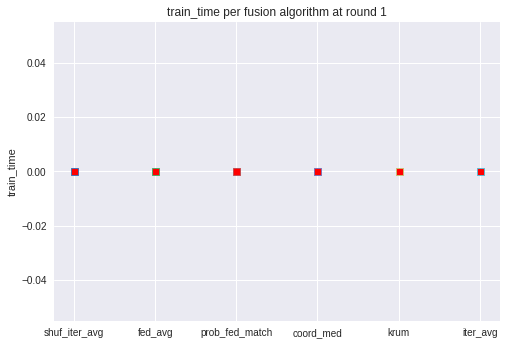

In [20]:
plot_results(results, 20, "train_time")

plot_results(results, 10, "train_time")

plot_results(results, 1, "train_time")

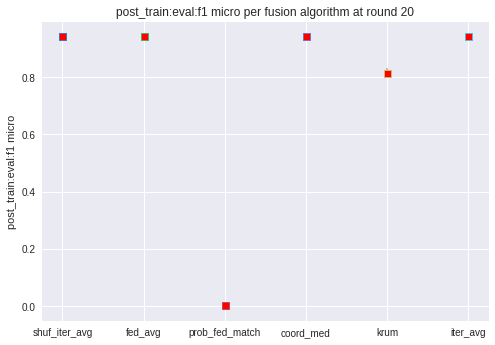

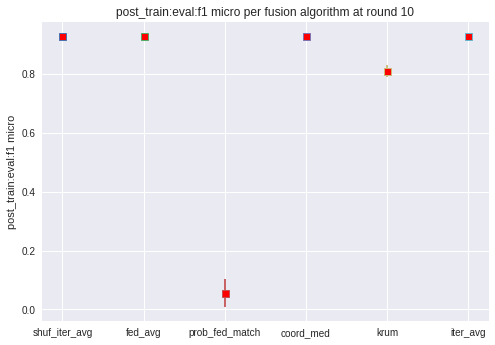

/home/trevormaxjs/miniconda3/envs/fed/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


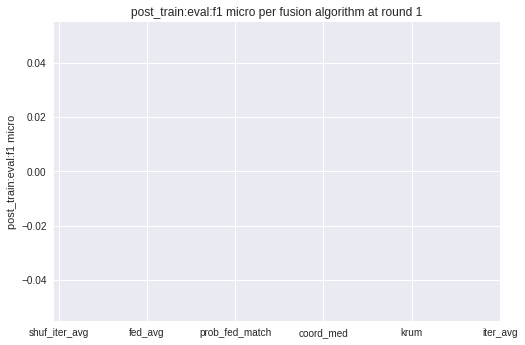

In [21]:
plot_results(results, 20, "post_train:eval:f1 micro")

plot_results(results, 10, "post_train:eval:f1 micro")

plot_results(results, 1, "post_train:eval:f1 micro")

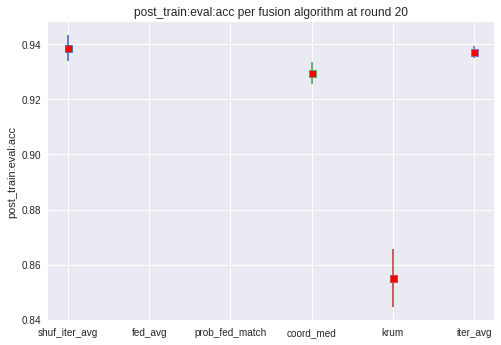

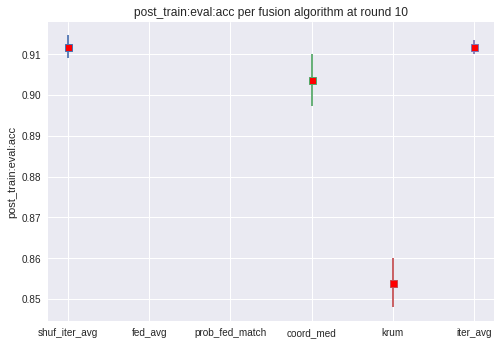

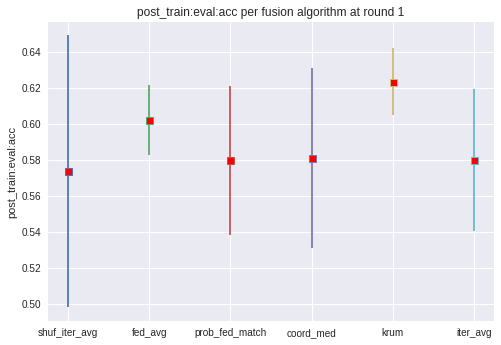

In [15]:
plot_results(results, 20, "post_train:eval:acc")

plot_results(results, 10, "post_train:eval:acc")

plot_results(results, 1, "post_train:eval:acc")

round number vs metric, plot all 6 curves

Usually add rounds but few epochs per round, start with 3 rounds. Find optimal number of rounds and use that as a baseline for further tests.

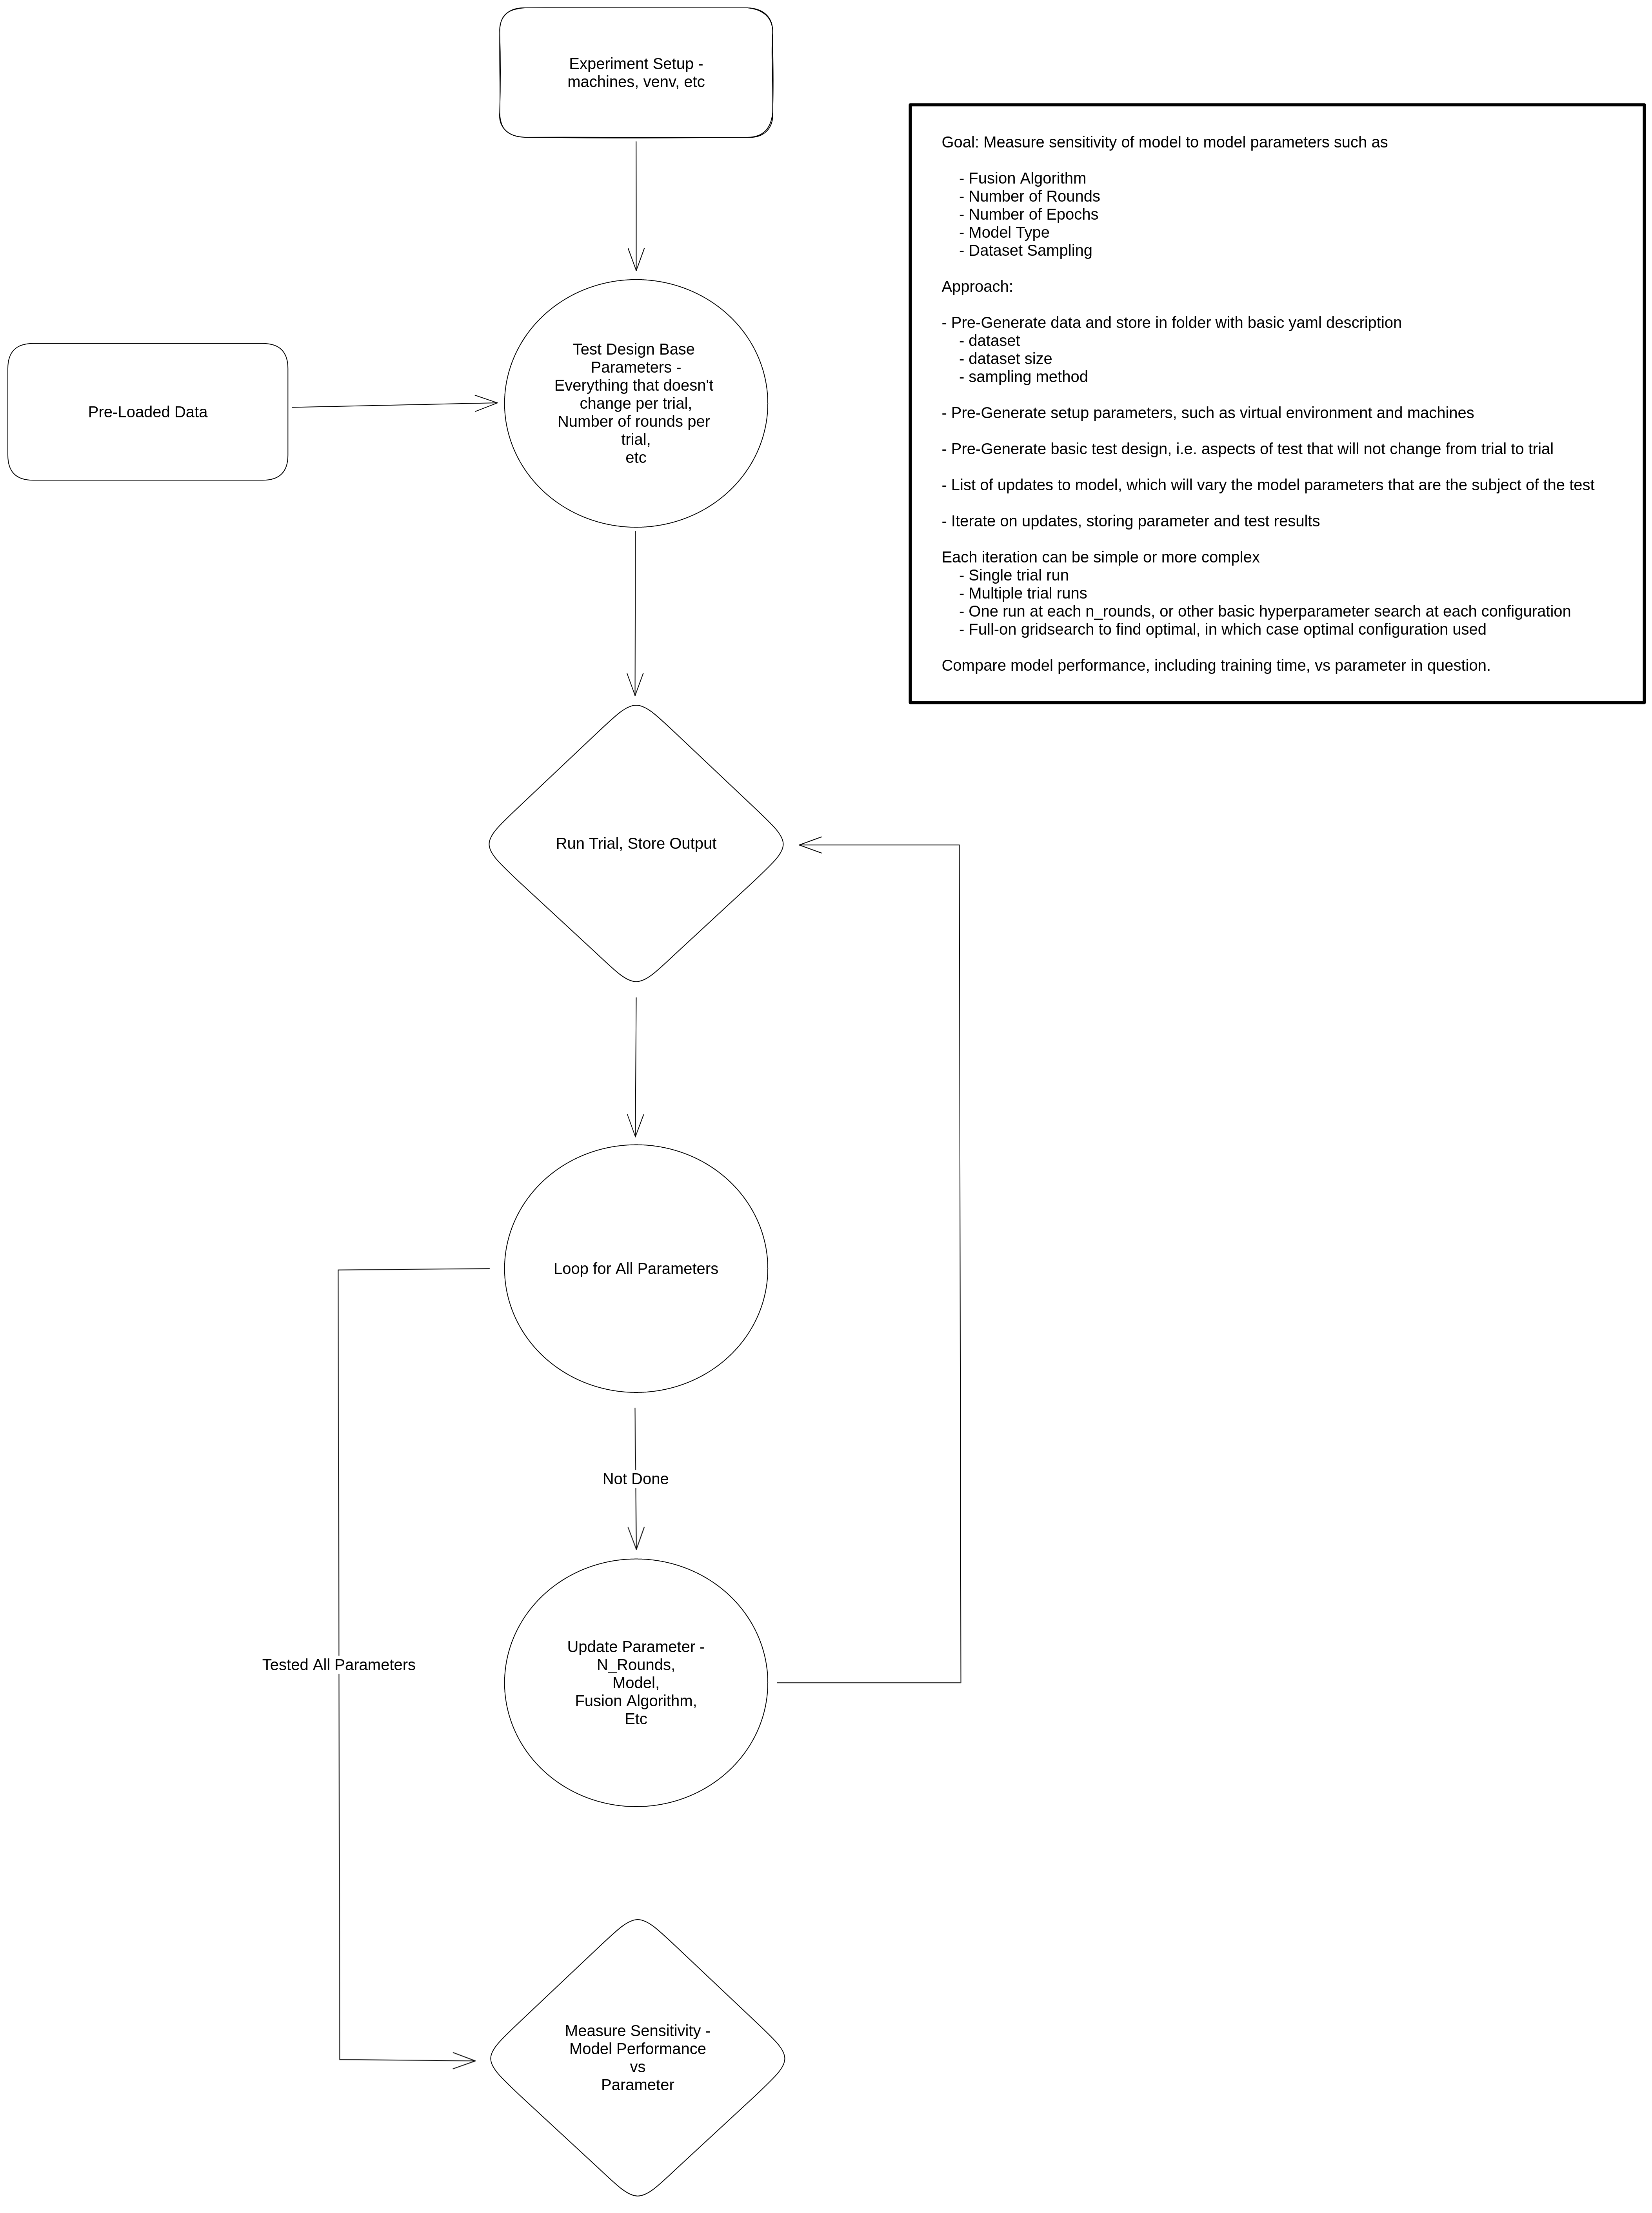